In [2]:
import os
from matplotlib import pyplot as plt

In [3]:
def parse_statistics(stats):
    stats_list = stats.strip().split(" ")
    stats_list = [float(x) for x in stats_list]
    return stats_list

In [4]:
def create_stats_dict(dir):
    directory_path = os.path.join(os.getcwd(), dir)
    path = os.walk(directory_path)

    stats_dir = {}

    for root, _, files in path:
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    stats = f.readlines()[-1]
                    stats = parse_statistics(stats)
                    instance_number = int(file_path.split("/")[-1].split(".")[0].split("-")[-1])
                    stats_dir[instance_number] = stats[0]
    
    return stats_dir




In [5]:
def parse_stats_dict(stats_dict):
    stats_dict = {k: v for k, v in sorted(stats_dict.items(), key=lambda item: item[0])}
    keys = list(stats_dict.keys())
    values = list(stats_dict.values())
    return keys, values

In [10]:
model = 'VLSIdesign'
cp_dir = f"CP/out/{model}"

cp_stats = create_stats_dict(cp_dir)
cp_keys, cp_values = parse_stats_dict(cp_stats)

cp_stats = create_stats_dict(cp_dir)
cp_keys, cp_values = parse_stats_dict(cp_stats)

sat_dir_no_rotation = "SAT/sat_solutions"
sat_dir_rotation = "SAT/sat_solutions_rot"
sat_dir_timeout = "SAT/sat_solutions_timeout"

sat_stats_no_rotation = create_stats_dict(sat_dir_no_rotation)
sat_stats_rotation = create_stats_dict(sat_dir_rotation)
sat_stats_timeout = create_stats_dict(sat_dir_timeout)

sat_keys_no_rotation, sat_values_no_rotation = parse_stats_dict(sat_stats_no_rotation)
sat_keys_rotation, sat_values_rotation = parse_stats_dict(sat_stats_rotation)
sat_keys_timeout, sat_values_timeout = parse_stats_dict(sat_stats_timeout)

In [11]:
import numpy as np

def plot_stats(keys, values, title, xlabel, ylabel):
    max_instance = max(keys)
    xs = np.arange(1, max_instance + 1)
    plt.plot(keys, values, marker="o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(xs)
    plt.ylabel(ylabel)
    plt.show()

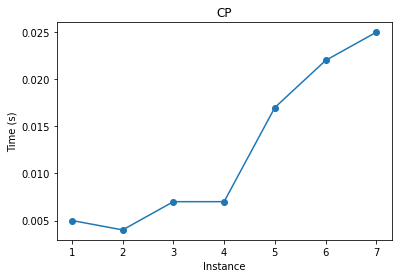

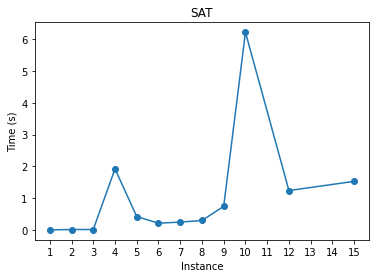

In [13]:
plot_stats(cp_keys, cp_values, "CP", "Instance", "Time (s)")
plot_stats(sat_keys_no_rotation, sat_values_no_rotation, f"SAT", "Instance", "Time (s)")

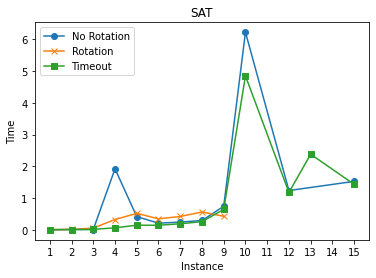

In [14]:
max_instance = np.max(sat_keys_no_rotation + sat_keys_rotation +  sat_keys_timeout)
xs = np.arange(1, max_instance + 1)


plt.plot(sat_keys_no_rotation, sat_values_no_rotation, marker="o")
plt.plot(sat_keys_rotation, sat_values_rotation, marker="x")
plt.plot(sat_keys_timeout, sat_values_timeout, marker="s")

plt.title("SAT")
plt.xlabel("Instance")
plt.xticks(xs)
plt.ylabel("Time")
plt.legend(["No Rotation", "Rotation", "Timeout"], loc="upper left")
plt.show()